<a href="https://colab.research.google.com/github/sarthak-2305/MNIST-digit-recognition/blob/main/mnist_digit_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#first step is importing everything
#numpy is arrays and math functions for ML
#matplotlib is for graphs and plotting
#tensorflow is the library for ML and has the models
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
#keras has a lot of other datasets for testing too including mnist
from tensorflow.keras.datasets import mnist
#sequential is a simple model with a stack of layers; most common
from tensorflow.keras.models import Sequential
#dense and flatten are two common layers for building neural networks
from tensorflow.keras.layers import Dense, Flatten
#used for multiclass classification tasks
from tensorflow.keras.utils import to_categorical

In [3]:
#doing the train test split of data and loading it
(X_train, y_train), (X_test, y_test) = mnist.load_data()

#normalize the images to be in the range [0, 1]
X_train = X_train / 255.0
X_test = X_test / 255.0

# One-hot encode the labels
#making the machine understand the human language sort of by transforming
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


In [4]:
model = Sequential([
    Flatten(input_shape=(28, 28)),  #convert the 28x28 images into 1D arrays
                                    #now the data is suitable for dense layer

    Dense(128, activation='relu'),  #first dense layer with ReLU activation
                                    #128 are the number of neurons

    Dense(10, activation='softmax')  #output layer with softmax activation for 10 classes
])

#compiling the model
#optimiser determines how weights are updated
#loss is the loss function
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [5]:
#fit returns a history object which has the details about the training process
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 13s 6ms/step - accuracy: 0.8815 - loss: 0.4327 - val_accuracy: 0.9584 - val_loss: 0.1400
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 15s 3ms/step - accuracy: 0.9622 - loss: 0.1325 - val_accuracy: 0.9687 - val_loss: 0.1036
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9750 - loss: 0.0820 - val_accuracy: 0.9715 - val_loss: 0.0967
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.9822 - loss: 0.0614 - val_accuracy: 0.9753 - val_loss: 0.0801
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 4ms/step - accuracy: 0.9861 - loss: 0.0457 - val_accuracy: 0.9764 - val_loss: 0.0784
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9893 - loss: 0.0350 - val_accuracy: 0.9781 - val_loss: 0.0756
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9911 - loss: 0.0280 - val_accuracy: 0.9747 - val_loss: 0.0886
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 4ms/step - accuracy: 0.9936 - loss: 0.021

In [6]:
#getting the accuracy results
test_loss, test_acc = model.evaluate(X_test, y_test)
print(f'Test accuracy: {test_acc:.4f}')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9703 - loss: 0.1124
Test accuracy: 0.9745


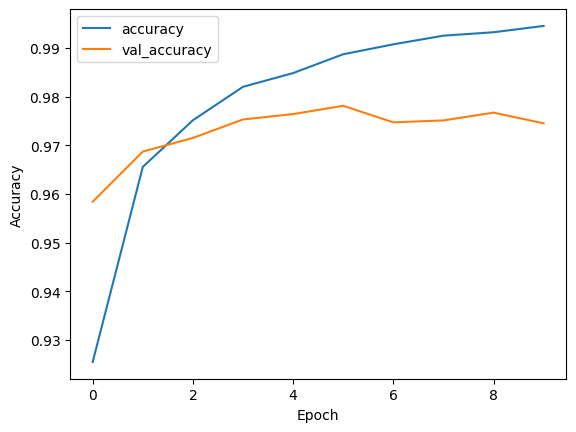

In [7]:
#plotting everything
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()